# Figure 6 and 7

In [1]:
using DifferentialEquations
using ModelingToolkit
using MitochondrialDynamics
using MitochondrialDynamics: second, μM, mV, mM, Hz, minute
import PythonPlot as plt
plt.matplotlib.rcParams["font.size"] = 14

14

In [2]:
glc = 4.0:0.5:30.0
@named sys = make_model()
prob = SteadyStateProblem(sys, [])

SteadyStateProblem with uType Vector{Float64}. In-place: true
u0: 9-element Vector{Float64}:
 0.057
 0.001
 0.0002
 0.092
 0.0029
 0.0087
 0.9
 0.24
 0.06

Change parameters

In [3]:
@unpack GlcConst, rETC, rHL, rF1, rPDH = sys

Model sys with 9 equations
Unknowns (9):
  NADH_m(t) [defaults to 0.057]
  NADH_c(t) [defaults to 0.001]
  Ca_m(t) [defaults to 0.0002]
  ΔΨm(t) [defaults to 0.092]
⋮
Parameters (64):
  NCac [defaults to 4]
  ActivatedCa [defaults to 0.00025]
  KatpCac [defaults to 25]
  RestingCa [defaults to 9.0e-5]
⋮

## Fig 6

In [4]:
prob_dm = SteadyStateProblem(sys, [], [rPDH=>0.5, rETC=>0.75, rHL=>1.4, rF1=>0.5])
prob_fccp = SteadyStateProblem(sys, [], [rHL=>5.0])
prob_rotenone = SteadyStateProblem(sys, [], [rETC=>0.1])
prob_oligomycin = SteadyStateProblem(sys, [], [rF1=>0.1])

function prob_func_glc(prob, i, repeat)
    remake(prob, p=[GlcConst => glc[i]])
end

prob_func_glc (generic function with 1 method)

DM cells

In [5]:
alg = DynamicSS(TRBDF2())
prob_func=prob_func_glc
trajectories = length(glc)

sols = solve(EnsembleProblem(prob; prob_func, safetycopy=false), alg; trajectories)
solsDM = solve(EnsembleProblem(prob_dm; prob_func, safetycopy=false), alg; trajectories);

In [6]:
function plot_fig6(sols, solsDM, glc; figsize=(10, 8), labels=["Baseline", "Diabetic"])
    glc5 = glc ./ 5
    numrows = 3
    numcols = 3

    fig, ax = plt.subplots(numrows, numcols; figsize)

    @unpack G3P = sys
    ax[0, 0].plot(glc5, extract(sols, G3P * 1000), label=labels[1])
    ax[0, 0].plot(glc5, extract(solsDM, G3P * 1000), label=labels[2])
    ax[0, 0].set_title("j", loc="left")
    ax[0, 0].set(ylabel="G3P (μM)")

    @unpack Pyr = sys
    ax[0, 1].plot(glc5, extract(sols, Pyr * 1000), label=labels[1])
    ax[0, 1].plot(glc5, extract(solsDM, Pyr * 1000), label=labels[2])
    ax[0, 1].set_title("k", loc="left")
    ax[0, 1].set(ylabel="Pyruvate (μM)")

    @unpack NADH_c, NAD_c = sys
    ax[0, 2].plot(glc5, extract(sols, NADH_c/NAD_c), label=labels[1])
    ax[0, 2].plot(glc5, extract(solsDM, NADH_c/NAD_c), label=labels[2])
    ax[0, 2].set_title("l", loc="left")
    ax[0, 2].set(ylabel="Cyto. NADH:NAD (ratio)")

    @unpack NADH_m, NAD_m = sys
    ax[1, 0].plot(glc5, extract(sols, NADH_m/NAD_m), label=labels[1])
    ax[1, 0].plot(glc5, extract(solsDM, NADH_m/NAD_m), label=labels[2])
    ax[1, 0].set_title("m", loc="left")
    ax[1, 0].set(ylabel="Mito. NADH:NAD (ratio)")

    @unpack Ca_c = sys
    ax[1, 1].plot(glc5, extract(sols, Ca_c * 1000), label=labels[1])
    ax[1, 1].plot(glc5, extract(solsDM, Ca_c * 1000), label=labels[2])
    ax[1, 1].set_title("n", loc="left")
    ax[1, 1].set(ylabel="Cyto. calcium (μM)")

    @unpack Ca_m = sys
    ax[1, 2].plot(glc5, extract(sols, Ca_m * 1000), label=labels[1])
    ax[1, 2].plot(glc5, extract(solsDM, Ca_m * 1000), label=labels[2])
    ax[1, 2].set_title("o", loc="left")
    ax[1, 2].set(ylabel="Mito. calcium (μM)")

    @unpack ΔΨm = sys
    ax[2, 0].plot(glc5, extract(sols, ΔΨm * 1000), label=labels[1])
    ax[2, 0].plot(glc5, extract(solsDM, ΔΨm * 1000), label=labels[2])
    ax[2, 0].set_title("p", loc="left")
    ax[2, 0].set(xlabel="Glucose (X)", ylabel="ΔΨ (mV)")

    @unpack ATP_c, ADP_c = sys
    ax[2, 1].plot(glc5, extract(sols, ATP_c/ADP_c), label=labels[1])
    ax[2, 1].plot(glc5, extract(solsDM, ATP_c/ADP_c), label=labels[2])
    ax[2, 1].set_title("q", loc="left")
    ax[2, 1].set(xlabel="Glucose (X)", ylabel="ATP:ADP (ratio)")

    @unpack degavg = sys
    ax[2, 2].plot(glc5, extract(sols, degavg), label=labels[1])
    ax[2, 2].plot(glc5, extract(solsDM, degavg), label=labels[2])
    ax[2, 2].set_title("r", loc="left")
    ax[2, 2].set(xlabel="Glucose (X)", ylabel="Avg. node degree (ratio)")

    for i in 0:numrows-1, j in 0:numcols-1
        ax[i, j].grid()
        ax[i, j].legend()
    end

    fig.tight_layout()
    return fig
end

plot_fig6 (generic function with 1 method)

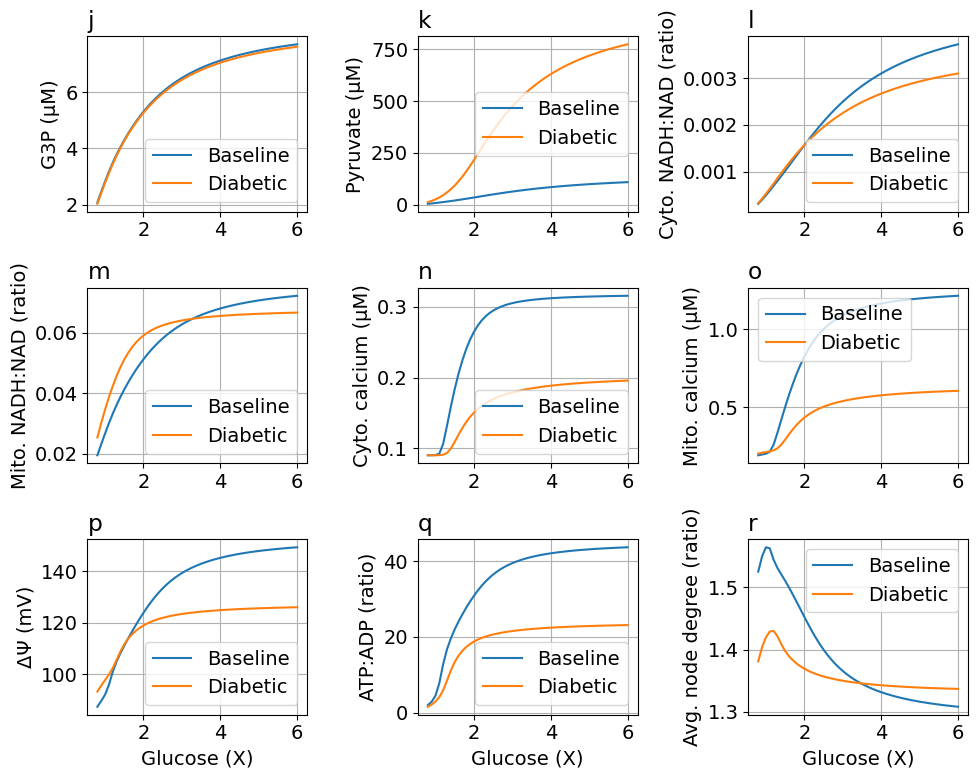

In [7]:
fig6 = plot_fig6(sols, solsDM, glc)

Export figure

In [8]:
exportTIF(fig6, "Fig7-DM-steadystates.tif")

Python: None

## Figure 7

In [9]:
sols = solve(EnsembleProblem(prob; prob_func, safetycopy=false), alg; trajectories)
solsDM = solve(EnsembleProblem(prob_dm; prob_func, safetycopy=false), alg; trajectories)
solsFCCP = solve(EnsembleProblem(prob_fccp; prob_func, safetycopy=false), alg; trajectories)
solsRot = solve(EnsembleProblem(prob_oligomycin; prob_func, safetycopy=false), alg; trajectories)
solsOligo = solve(EnsembleProblem(prob_rotenone; prob_func, safetycopy=false), alg; trajectories);

In [10]:
function plot_fig7(sols, solsDM, solsFCCP, solsRot, solsOligo, glc; figsize=(12, 6))
    sys = sols[begin].prob.f.sys
    @unpack J_HL, J_ANT = sys
    # Gather ATP synthesis rate (fusion) and proton leak rate (fission)
    jHL_baseline = extract(sols, J_HL)
    jANT_baseline = extract(sols, J_ANT)
    ff_baseline = jANT_baseline ./ jHL_baseline
    jHL_dm = extract(solsDM, J_HL)
    jANT_dm = extract(solsDM, J_ANT)
    ff_dm = jANT_dm ./ jHL_dm
    jHL_fccp = extract(solsFCCP, J_HL)
    jANT_fccp = extract(solsFCCP, J_ANT)
    ff_fccp = jANT_fccp ./ jHL_fccp
    jHL_rot = extract(solsRot, J_HL)
    jANT_rot = extract(solsRot, J_ANT)
    ff_rot = jANT_rot ./ jHL_rot
    jHL_oligo = extract(solsOligo, J_HL)
    jANT_oligo = extract(solsOligo, J_ANT)
    ff_oligo = jANT_oligo ./ jHL_oligo

    glc5 = glc ./ 5

    fig, ax = plt.subplots(1, 2; figsize)

    ax[0].plot(glc5, ff_baseline, "b-", label="Baseline")
    ax[0].plot(glc5, ff_dm, "r--", label="Diabetic")
    ax[0].plot(glc5, ff_rot, "g--", label="Rotenone")
    ax[0].plot(glc5, ff_oligo, "c--", label="Oligomycin")
    ax[0].plot(glc5, ff_fccp, "k--", label="Uncoupler")
    ax[0].set(xlabel="Glucose (X)", ylabel="Fusion rate / Fission rate (ratio)", xlim=(0.0, 6.0), ylim=(0.0, 2.5))
    ax[0].set_title("a", loc="left")
    ax[0].grid()
    ax[0].legend()

    ax[1].plot(jHL_baseline, jANT_baseline, "bo-", label="Baseline")
    ax[1].plot(jHL_dm, jANT_dm, "ro-", label="Diabetic")
    ax[1].plot(jHL_rot, jANT_rot, "go-", label="Rotenone")
    ax[1].plot(jHL_oligo, jANT_oligo, "co-", label="Oligomycin")
    ax[1].plot(jHL_fccp, jANT_fccp, "ko-", label="Uncoupler")
    ax[1].set(xlabel="Proton leak rate (mM/s)", ylabel="ATP synthase rate (mM/s)", xlim=(0.0, 0.45), ylim=(0.0, 0.15))
    ax[1].set_title("b", loc="left")
    ax[1].grid()
    ax[1].legend()

    fig.tight_layout()
    return fig
end

plot_fig7 (generic function with 1 method)

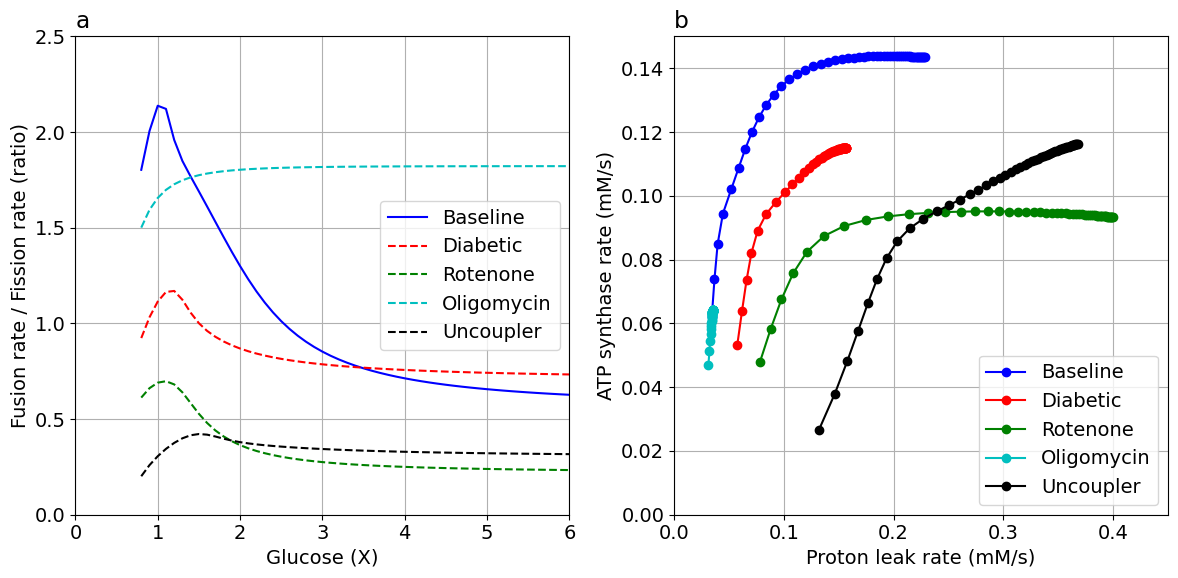

In [11]:
fig7 = plot_fig7(sols, solsDM, solsFCCP, solsRot, solsOligo, glc)

Export figure

In [12]:
exportTIF(fig7, "Fig8.tif")

Python: None

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*